In [1]:
import os
import pandas as pd
os.chdir("/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22")
from madnessReader import MadnessReader
from madnessReader import ExcitedData
from madnessReader import FrequencyData
from daltonRunner import DaltonRunner
dalton_reader = DaltonRunner()

/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22


In [2]:
basis_list=['aug-cc-pVDZ','aug-cc-pVTZ','aug-cc-pVQZ','aug-cc-pV5Z','aug-cc-pV6Z']
d_basis_list=['d-aug-cc-pVDZ','d-aug-cc-pVTZ','d-aug-cc-pVQZ','d-aug-cc-pV5Z','d-aug-cc-pV6Z']

In [3]:
def create_polar_table(mol,xc,basis_list,xx):
    
    ground_dalton, response_dalton = dalton_reader.get_frequency_result(mol, 'hf', 'dipole', basis_list[0])
    freq=response_dalton['frequencies']
    g_data={}
    xx_data=[]
    for i in range(len(freq)):
        xx_data.append({})
    for basis in basis_list:
        ground_dalton, response_dalton = dalton_reader.get_frequency_result(mol, 'hf', 'dipole', basis)
        for i in range(len(freq)):
            xx_data[i][basis]=response_dalton[xx][i]
        g_data[basis]=ground_dalton['totalEnergy']
    g_df=pd.Series(g_data)
    g_df.name='Total HF Energy'
    names=[]
    for f in freq:
        raw_f = r'{}'.format(str(f)) 
        #names.append(r'$$\alpha_{xx}('+raw_f+r')$$')
        names.append('a('+'{:.3f}'.format(f)+')')
    r_dfs=[]
    for i in range(len(freq)):
        r_dfs.append(pd.Series(xx_data[i]))
        r_dfs[i].name=names[i]
    dalton_df=pd.concat([g_df]+r_dfs,axis=1)

    moldata=FrequencyData(mol,'hf','dipole')
    moldata.polar_df[xx]
    mad_data_e={}
    mad_data_r={}
    mad_data_e['Total HF Energy']=moldata.ground_e['e_tot']

    for i in range(len(names)):
        mad_data_r[names[i]]=moldata.polar_df[xx][i]
    
    mad_data_e=pd.Series(mad_data_e)
    mad_data_r=pd.Series(mad_data_r)
    
    mad_data=pd.concat([mad_data_e,mad_data_r],axis=0)
    mad_data.name='MRA'
    return dalton_df.append(mad_data)
    
    return dalton_df

In [4]:
create_polar_table('Ne','hf',basis_list,'xx')

/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Ne/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Ne/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Ne/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Ne/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Ne/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Ne/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/Ne/calc_info.json


,Total HF Energy,a(0.000),a(0.046),a(0.092),a(0.184),a(0.369)
aug-cc-pVDZ,-128.496350,1.831917,1.834578,1.842658,1.876532,2.044189
aug-cc-pVTZ,-128.533273,2.193942,2.197366,2.207755,2.251182,2.463809
aug-cc-pVQZ,-128.543756,2.328988,2.332972,2.345061,2.395566,2.642308
aug-cc-pV5Z,-128.546786,2.363141,2.367415,2.380388,2.434655,2.701346
aug-cc-pV6Z,-128.547062,2.369781,2.374146,2.387398,2.442887,2.716927
MRA,-128.546998,2.376718,2.381183,2.394755,2.451837,2.736193


In [5]:
create_polar_table('He','hf',basis_list,'xx').iloc[:,1:]


/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/He/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/He/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/He/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/He/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/He/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/He/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/He/calc_info.json


,a(0.000),a(0.049),a(0.099),a(0.198),a(0.395)
aug-cc-pVDZ,1.303925,1.306791,1.315466,1.351399,1.518182
aug-cc-pVTZ,1.315968,1.319136,1.328739,1.368724,1.558825
aug-cc-pVQZ,1.321550,1.324887,1.335014,1.377334,1.582284
aug-cc-pV5Z,1.321232,1.324620,1.334904,1.377967,1.588567
aug-cc-pV6Z,1.321432,1.324824,1.335126,1.378290,1.590172
MRA,1.322443,1.325867,1.336182,1.379437,1.593004


In [6]:
create_polar_table('H2O','hf',basis_list,'xx').iloc[:,1:]


/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2O/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2O/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2O/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2O/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2O/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2O/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/H2O/calc_info.json


,a(0.000),a(0.020),a(0.040),a(0.079),a(0.159)
aug-cc-pVDZ,7.325093,7.334490,7.362996,7.482065,8.063255
aug-cc-pVTZ,7.723695,7.733549,7.763425,7.887907,8.488541
aug-cc-pVQZ,7.847663,7.857854,7.888747,8.017363,8.635463
aug-cc-pV5Z,7.881032,7.891395,7.922805,8.053553,8.681258
aug-cc-pV6Z,7.893305,7.903762,7.935458,8.067406,8.700929
MRA,7.546772,7.556932,7.587169,7.714033,8.294464


In [7]:
def create_data(mol,basis_list):
    
    res_dict={'xx':'density_residualX','yy':'density_residualY','zz':'density_residualZ'}
    
    
    moldata=FrequencyData(mol,'hf','dipole')
    xx=['xx','yy','zz']
    data=[]
    for x in xx:
        data.append(create_polar_table(mol,'hf',basis_list,x))
    average=(data[0]+data[1]+data[2])/3
    
    diff_data=average-average.loc['MRA']
    diff_data=diff_data.drop(index='MRA')
    
    polar_diff=diff_data.drop('Total HF Energy',axis=1)
    
    residuals=moldata.final_density_residuals()
    
    cleanX=residuals['density_residualX'].reset_index().drop('index',axis=1)
    cleanY=residuals['density_residualY'].reset_index().drop('index',axis=1)
    cleanZ=residuals['density_residualZ'].reset_index().drop('index',axis=1)
    
    cleanX.rename(columns={'density_residualX':'MRA density residual'},inplace=True)
    cleanY.rename(columns={'density_residualY':'MRA density residual'},inplace=True)
    cleanZ.rename(columns={'density_residualZ':'MRA density residual'},inplace=True)
    clean=(cleanX+cleanY+cleanZ)/3
    clean.index=polar_diff.T.index
    
    average=average.append(clean.T)
    average.name='Average Polarizability'
    
    
    energy_diff=diff_data['Total HF Energy']
    return average,diff_data,energy_diff,polar_diff

basis_list=['aug-cc-pVDZ','aug-cc-pVTZ','aug-cc-pVQZ']
d_basis_list=['d-aug-cc-pVDZ','d-aug-cc-pVTZ','d-aug-cc-pVQZ']
data,diff_data,energy_diff,polar_diff=create_data('Be',basis_list,)
display(data)
display(diff_data)
display(polar_diff)
display(energy_diff)


mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/Be/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Be/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Be/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Be/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Be/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/Be/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Be/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Be/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Be/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Be/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-

,Total HF Energy,a(0.000),a(0.011),a(0.022),a(0.044),a(0.089)
aug-cc-pVDZ,-14.572379,44.913706,45.080233,45.587441,47.738055,58.900395
aug-cc-pVTZ,-14.572875,45.440357,45.615188,46.147978,48.411880,60.287363
aug-cc-pVQZ,-14.572969,45.598622,45.775820,46.315917,48.612406,60.699528
MRA,-14.572937,45.015120,45.137262,45.483932,47.442520,57.500249
MRA density residual,NaN,0.000061,0.000701,0.002842,0.003604,0.006992


,Total HF Energy,a(0.000),a(0.011),a(0.022),a(0.044),a(0.089)
aug-cc-pVDZ,0.000558,-0.101413,-0.057029,0.103509,0.295535,1.400146
aug-cc-pVTZ,0.000062,0.425238,0.477927,0.664046,0.969360,2.787114
aug-cc-pVQZ,-0.000032,0.583502,0.638558,0.831985,1.169886,3.199280


,a(0.000),a(0.011),a(0.022),a(0.044),a(0.089)
aug-cc-pVDZ,-0.101413,-0.057029,0.103509,0.295535,1.400146
aug-cc-pVTZ,0.425238,0.477927,0.664046,0.969360,2.787114
aug-cc-pVQZ,0.583502,0.638558,0.831985,1.169886,3.199280


aug-cc-pVDZ    0.000558
aug-cc-pVTZ    0.000062
aug-cc-pVQZ   -0.000032
Name: Total HF Energy, dtype: float64

In [10]:

import matplotlib.pyplot as plt


def create_polar_diff_plot(mol,basis_list):
    
    
    title=mol
    yl=r' $\Delta\alpha_{avg}$'+r' (MRA - BASIS)'
    
    
    data,diff_data,energy_diff,polar_diff=create_data(mol,basis_list)
    polar_diff.iloc[:,:].plot(marker='o', linestyle='solid')
    plt.axhline(linewidth=2,ls='--',color='k',label="MRA Reference")
    plt.xlabel
    plt.legend(fontsize=12)
    plt.xticks(fontsize=14,rotation = 20)
    plt.title(title,fontsize=20)
    plt.ylabel(yl, fontsize=14)
    save=mol+'-'+basis_list[0]
    if not os.path.exists("figures"):
        os.mkdir("figures")
    if not os.path.exists("tables"):
        os.mkdir("tables")
    save='figures/'+save+'.svg'
    plt.savefig(save)
    
    latex_save=mol+'-'+basis_list[0]
    latex_save='tables/'+latex_save+'.tex'
    data=data.round(decimals=3)
    data.to_latex(latex_save,na_rep=' ')
    
    
    return data

mol_list=['Ne','H2O','H2',]



Paper: Static Polar He:  1.3222
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/He/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/He/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/He/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/He/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/He/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/He/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/He/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/He/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/He/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/He/dipole/freq.dal
mad_path /home/adrianhurtado/tes

,Total HF Energy,a(0.000),a(0.049),a(0.099),a(0.198),a(0.395)
aug-cc-pVDZ,-2.856,1.304,1.307,1.315,1.351,1.518
aug-cc-pVTZ,-2.861,1.316,1.319,1.329,1.369,1.559
aug-cc-pVQZ,-2.862,1.322,1.325,1.335,1.377,1.582
MRA,-2.862,1.322,1.326,1.336,1.379,1.593
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.000


,Total HF Energy,a(0.000),a(0.049),a(0.099),a(0.198),a(0.395)
d-aug-cc-pVDZ,-2.856,1.329,1.332,1.342,1.384,1.589
d-aug-cc-pVTZ,-2.861,1.324,1.327,1.337,1.380,1.592
d-aug-cc-pVQZ,-2.862,1.322,1.326,1.336,1.379,1.593
MRA,-2.862,1.322,1.326,1.336,1.379,1.593
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.000


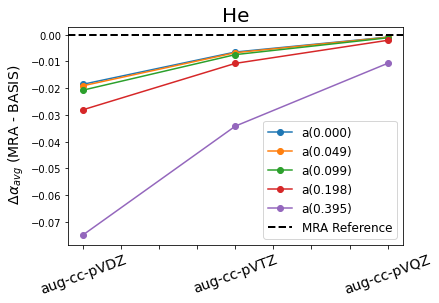

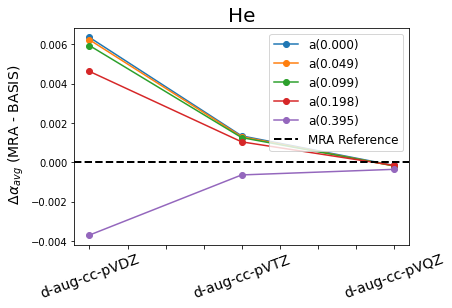

In [11]:
print('Paper: Static Polar He: ',1.3222)
d1=create_polar_diff_plot('He',basis_list)
d2=create_polar_diff_plot('He',d_basis_list)
display(d1)
display(d2)

Paper: Static Polar H2:  not given
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/H2/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/H2/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2/dipole/freq.dal
mad_path /home/adrianhurtado/

,Total HF Energy,a(0.000),a(0.029),a(0.058),a(0.116),a(0.233)
aug-cc-pVDZ,-1.129,5.115,5.129,5.173,5.355,6.253
aug-cc-pVTZ,-1.133,5.240,5.256,5.302,5.498,6.472
aug-cc-pVQZ,-1.133,5.229,5.244,5.291,5.489,6.477
MRA,-1.133,5.230,5.245,5.292,5.489,6.482
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.000


,Total HF Energy,a(0.000),a(0.029),a(0.058),a(0.116),a(0.233)
d-aug-cc-pVDZ,-1.129,5.184,5.199,5.246,5.442,6.424
d-aug-cc-pVTZ,-1.133,5.239,5.254,5.301,5.499,6.494
d-aug-cc-pVQZ,-1.133,5.226,5.242,5.289,5.486,6.480
MRA,-1.133,5.230,5.245,5.292,5.489,6.482
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.000


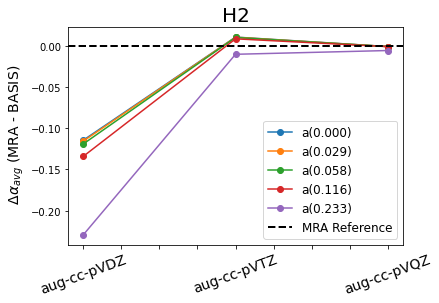

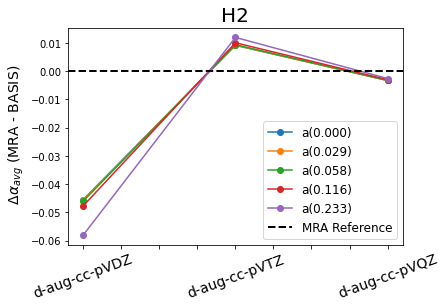

In [12]:
print('Paper: Static Polar H2: ','not given')
d1=create_polar_diff_plot('H2',basis_list)
d2=create_polar_diff_plot('H2',d_basis_list)
display(d1)
display(d2)


Paper: Static Polar Be:  45.6199
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/Be/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Be/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Be/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/Be/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Be/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Be/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/Be/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Be/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Be/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/Be/calc_info.json
mad_path /home/adrianhurtado/testin

,Total HF Energy,a(0.000),a(0.011),a(0.022),a(0.044),a(0.089)
aug-cc-pVDZ,-14.572,44.914,45.080,45.587,47.738,58.900
MRA,-14.573,45.015,45.137,45.484,47.443,57.500
MRA density residual,NaN,0.000,0.001,0.003,0.004,0.007


,Total HF Energy,a(0.000),a(0.011),a(0.022),a(0.044),a(0.089)
d-aug-cc-pVDZ,-14.572,44.993,45.160,45.670,47.830,59.050
MRA,-14.573,45.015,45.137,45.484,47.443,57.500
MRA density residual,NaN,0.000,0.001,0.003,0.004,0.007


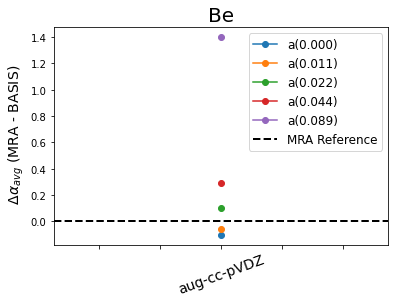

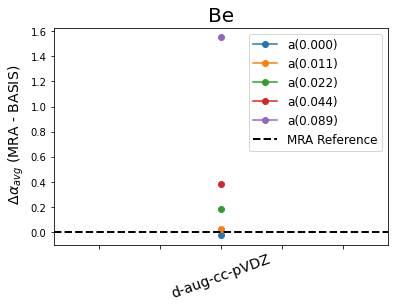

In [13]:
print('Paper: Static Polar Be: ',45.6199)
d1=create_polar_diff_plot('Be',basis_list[0:-2])
d2=create_polar_diff_plot('Be',d_basis_list[0:-2])
display(d1)
display(d2)



Paper: Static Polar Ne:  2.377
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/Ne/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Ne/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Ne/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Ne/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Ne/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/Ne/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Ne/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Ne/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Ne/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/Ne/dipole/freq.dal
mad_path /home/adrianhurtado/test

,Total HF Energy,a(0.000),a(0.046),a(0.092),a(0.184),a(0.369)
aug-cc-pVDZ,-128.496,1.832,1.835,1.843,1.877,2.044
aug-cc-pVTZ,-128.533,2.194,2.197,2.208,2.251,2.464
aug-cc-pVQZ,-128.544,2.329,2.333,2.345,2.396,2.642
MRA,-128.547,2.377,2.381,2.395,2.452,2.736
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.000


,Total HF Energy,a(0.000),a(0.046),a(0.092),a(0.184),a(0.369)
d-aug-cc-pVDZ,-128.496,2.353,2.358,2.371,2.425,2.694
d-aug-cc-pVTZ,-128.533,2.375,2.379,2.393,2.449,2.729
d-aug-cc-pVQZ,-128.544,2.380,2.384,2.398,2.455,2.738
MRA,-128.547,2.377,2.381,2.395,2.452,2.736
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.000


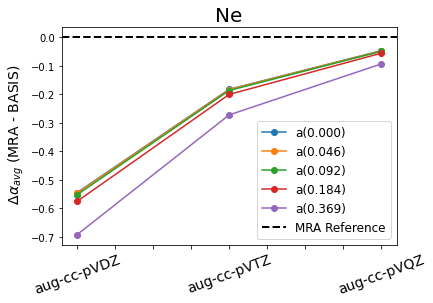

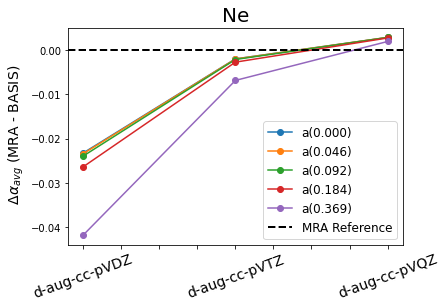

In [14]:

print('Paper: Static Polar Ne: ',2.3770)
d1=create_polar_diff_plot('Ne',basis_list)
d2=create_polar_diff_plot('Ne',d_basis_list)
display(d1)
display(d2)




mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/H2O/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2O/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2O/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2O/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2O/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/H2O/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2O/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2O/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2O/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/H2O/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness-test-suit

,Total HF Energy,a(0.000),a(0.020),a(0.040),a(0.079),a(0.159)
aug-cc-pVDZ,-76.041,8.141,8.150,8.175,8.281,8.763
aug-cc-pVTZ,-76.061,8.428,8.437,8.464,8.575,9.079
aug-cc-pVQZ,-76.066,8.508,8.518,8.545,8.659,9.176
MRA,-76.067,7.546,7.552,7.572,7.654,8.013
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.001


,Total HF Energy,a(0.000),a(0.020),a(0.040),a(0.079),a(0.159)
d-aug-cc-pVDZ,-76.042,8.522,8.531,8.559,8.676,9.205
d-aug-cc-pVTZ,-76.061,8.545,8.554,8.582,8.699,9.229
d-aug-cc-pVQZ,-76.066,8.544,8.553,8.582,8.698,9.227
MRA,-76.067,7.546,7.552,7.572,7.654,8.013
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.001


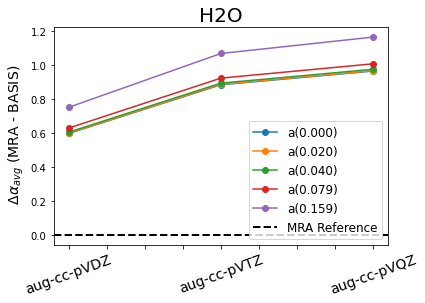

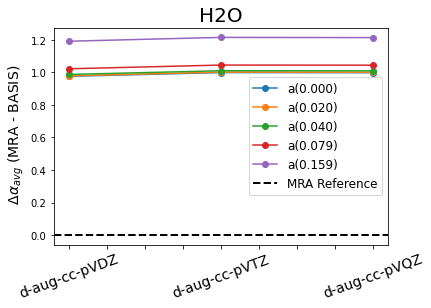

In [15]:
d1=create_polar_diff_plot('H2O',basis_list)
d2=create_polar_diff_plot('H2O',d_basis_list)
display(d1)
display(d2)


mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/BeH2/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/BeH2/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/BeH2/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/BeH2/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/BeH2/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/BeH2/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/BeH2/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/BeH2/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/BeH2/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/BeH2/calc_info.json
mad_path /home/adrianhurtado/testing/madness-tes

,Total HF Energy,a(0.000),a(0.016),a(0.032),a(0.065),a(0.130)
aug-cc-pVDZ,-15.768,19.040,19.074,19.177,19.60,21.527
MRA,-15.773,19.095,19.131,19.242,19.69,21.779
MRA density residual,NaN,0.000,0.000,0.000,0.00,0.005


,Total HF Energy,a(0.000),a(0.016),a(0.032),a(0.065),a(0.130)
d-aug-cc-pVDZ,-15.769,19.068,19.102,19.206,19.634,21.590
MRA,-15.773,19.095,19.131,19.242,19.690,21.779
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.005


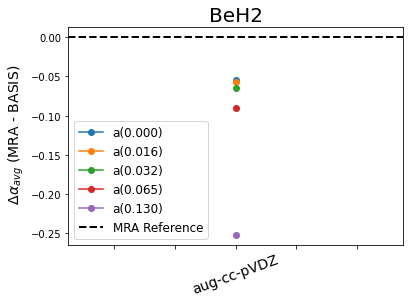

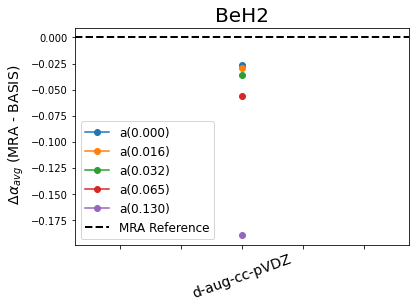

In [16]:
d1=create_polar_diff_plot('BeH2',basis_list[0:-2])
d2=create_polar_diff_plot('BeH2',d_basis_list[0:-2])
display(d1)
display(d2)

mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/C2H2/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/C2H2/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/C2H2/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/C2H2/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/C2H2/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/C2H2/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/C2H2/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/C2H2/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/C2H2/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/C2H2/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness

,Total HF Energy,a(0.000),a(0.014),a(0.027),a(0.055),a(0.110)
aug-cc-pVDZ,-76.828,22.801,22.821,22.882,23.133,24.223
aug-cc-pVTZ,-76.850,23.333,23.354,23.419,23.685,24.840
aug-cc-pVQZ,-76.855,23.407,23.429,23.496,23.766,24.945
MRA,-76.855,23.261,23.234,23.298,23.559,24.694
MRA density residual,NaN,0.000,0.001,0.001,0.001,0.001


,Total HF Energy,a(0.000),a(0.014),a(0.027),a(0.055),a(0.110)
d-aug-cc-pVDZ,-76.829,23.358,23.380,23.446,23.717,24.898
d-aug-cc-pVTZ,-76.850,23.429,23.451,23.518,23.791,24.981
d-aug-cc-pVQZ,-76.855,23.422,23.444,23.511,23.784,24.973
MRA,-76.855,23.261,23.234,23.298,23.559,24.694
MRA density residual,NaN,0.000,0.001,0.001,0.001,0.001


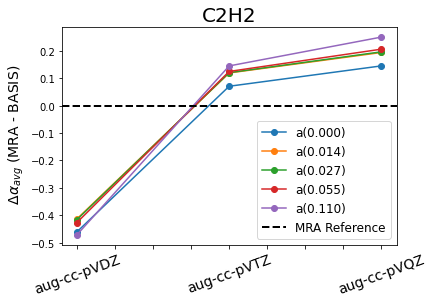

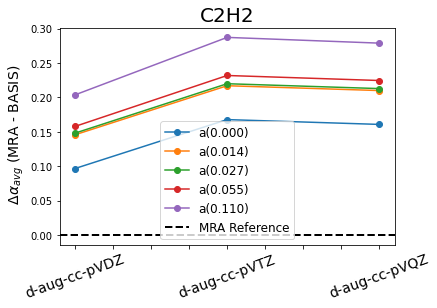

In [17]:
d1=create_polar_diff_plot('C2H2',basis_list)
d2=create_polar_diff_plot('C2H2',d_basis_list)
display(d1)
display(d2)



mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/CH4/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/CH4/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/CH4/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/CH4/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/CH4/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/CH4/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/CH4/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/CH4/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/CH4/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/CH4/dipole/freq.dal
mad_path /home/adrianhurtado/testing/madness-test-suit

,Total HF Energy,a(0.000),a(0.025),a(0.051),a(0.102),a(0.203)
aug-cc-pVDZ,-40.200,15.930,15.962,16.059,16.464,18.397
aug-cc-pVTZ,-40.214,15.994,16.026,16.126,16.540,18.520
aug-cc-pVQZ,-40.216,15.994,16.027,16.127,16.543,18.534
MRA,-40.217,14.511,14.536,14.608,14.902,16.250
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.002


,Total HF Energy,a(0.000),a(0.025),a(0.051),a(0.102),a(0.203)
d-aug-cc-pVDZ,-40.200,16.010,16.043,16.143,16.561,18.563
d-aug-cc-pVTZ,-40.214,16.001,16.034,16.134,16.551,18.549
d-aug-cc-pVQZ,-40.216,15.997,16.030,16.130,16.547,18.542
MRA,-40.217,14.511,14.536,14.608,14.902,16.250
MRA density residual,NaN,0.000,0.000,0.000,0.000,0.002


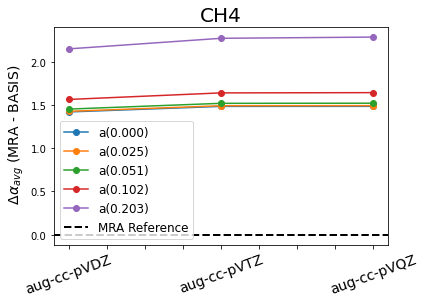

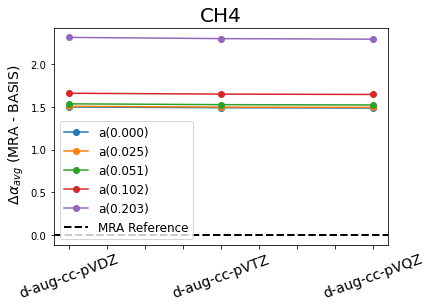

In [18]:

d1=create_polar_diff_plot('CH4',basis_list)
d2=create_polar_diff_plot('CH4',d_basis_list)
display(d1)
display(d2)

In [19]:

d1=create_polar_diff_plot('HCl',basis_list)
d2=create_polar_diff_plot('HCl',d_basis_list)
display(d1)
display(d2)

mad_path /home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/hf/HCl/calc_info.json
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/HCl/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/HCl/dipole/freq.dal
/home/adrianhurtado/testing/madness-test-suite/timings-6-3-22/../dalton/hf/HCl/dipole/freq.dal


KeyError: 'calculationTime'

In [ ]:

d1=create_polar_diff_plot('HF',basis_list)
d2=create_polar_diff_plot('HF',d_basis_list)
display(d1)
display(d2)

In [ ]:

d1=create_polar_diff_plot('NH3',basis_list)
d2=create_polar_diff_plot('NH3',d_basis_list)
display(d1)
display(d2)